In [21]:
from numpy.random import rand
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [7]:
x = sp.Symbol('x')
y = sp.Symbol('y')

In [2]:
from sympy import exp

In [10]:
sp.integrate( 1/10*exp(-y/10), (y, 0, x) )

1.0 - 1.0*exp(-x/10)

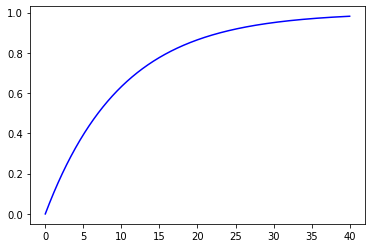

In [18]:
xx = np.linspace(0, 40, 1000)
yy = 1 - 1*np.exp(-xx/10)
plt.plot(xx, yy, 'b-')

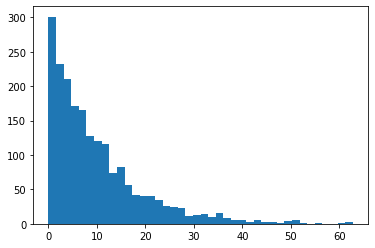

In [31]:
values = -10* np.log(rand(2000))
plt.hist(values, bins=40);

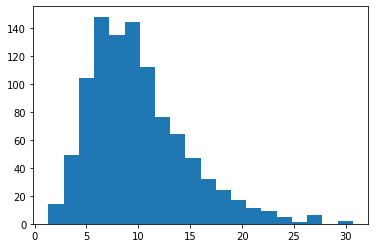

In [34]:
result = []
for k in range(1000):
    result += [np.mean(-10* np.log(rand(5)))]
    
plt.hist(result, bins=20);

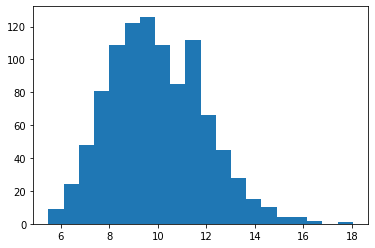

In [36]:
result = []
for k in range(1000):
    result += [np.mean(-10* np.log(rand(25)))]
    
plt.hist(result, bins=20);

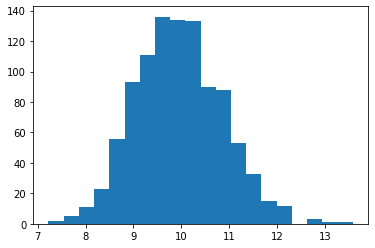

In [37]:
result = []
for k in range(1000):
    result += [np.mean(-10* np.log(rand(125)))]
    
plt.hist(result, bins=20);

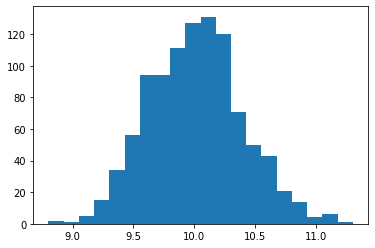

In [39]:
result = []
for k in range(1000):
    result += [np.mean(-10* np.log(rand(625)))]
    
plt.hist(result, bins=20);

### What about sampling multivariate non-indepedent continuous random variables.

Take as an example the multivariate probability density function:

$$ f(x_1, x_2) = C exp(- x_1^2 - x_2^2 + x_1 x_2) $$

Start by computing the normalization constant C.

Here exact integrals break down quickly.

In [25]:
scipy.integrate.dblquad(lambda x1, x2: np.exp(-x1**2 - x2**2 + x1*x2), -20, 20, lambda x2: -20, lambda x2: 20)

(3.6275987284691498, 1.4252806077239796e-08)

In [27]:
C = 1/3.6275987284691498
C

0.27566444771084175

In [30]:
f = lambda x1, x2: C*np.exp(-x1**2-x2**2 + x1*x2)
f(1, 1)

0.10141128297469874

Compute the marginal cummulative distributions for $ X_1$ and $X_2$

In [34]:
FX1 = lambda X1: scipy.integrate.dblquad(f, -20, X1, lambda x2: -20, lambda x2: 20)[0]
FX1(0)

0.4999999999999037

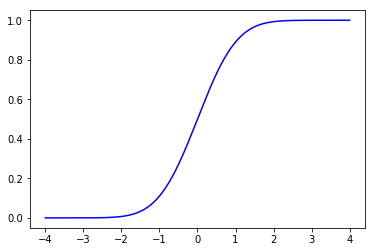

In [36]:
xx1 = np.linspace(-4, 4, 500)
yy1 = [FX1(xx) for xx in xx1]
plt.plot(xx1, yy1, 'b-')

In [37]:
FX2 = lambda X2: scipy.integrate.dblquad(f, -20, X2, lambda x1: -20, lambda x1: 20 )[0]
FX2(0)

0.4999999999999037

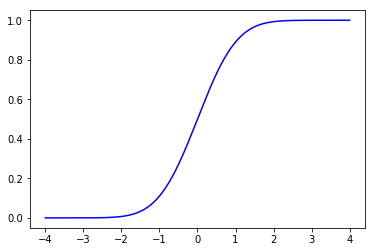

In [38]:
xx2 = np.linspace(-4, 4, 500)
yy2 = [FX2(xx) for xx in xx2]
plt.plot(xx2, yy2, 'b-')

The Cupola function of $u_1$ and $u_2$ is defined as:

$$ C(u_1, u_2) = F_{X_1, X_2}( F_{X_1}^{-1}(u_1), F_{X_2}^{-1}(u_2) ) $$

The multivariate density function is found by differentiating the multivariate cummulative distribution function:

$$ f_{X_1, X_2}(x_1, x_2) = \frac{\partial^2}{\partial x_1 \partial x_2} F_{X_1, X_2}(x_1, x_2) $$

so 

$$ f_{X_1, X_2}( x_1, x_2) = \left( \frac{\partial^2}{\partial u_1 \partial u_2} C(u_1, u_2) \right) \frac{\partial F_{X_1}(x_1)}{\partial x_1} \frac{\partial F_{X_2}(x_2)}{\partial x_2} $$

And thus this gives a formula for the copula density function in terms of the multivariate and marginal density functions:

$$ c(u_1, u_2) = \frac{ f_{X_1, X_2}(x_1, x_2)}{f_{X_1}(x_1) f_{X_2}(x_2) } $$


In [45]:
f1 = lambda x1: scipy.integrate.quad(lambda x2: f(x1, x2), -20, 20)[0]
f2 = lambda x2: scipy.integrate.quad(lambda x1: f(x1, x2), -20, 20)[0]

In [65]:
delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
xx1, xx2 = np.meshgrid(x1, x2)
n1, n2 = xx1.shape

UU1 = []
UU2 = []
ZZ = []
for k1 in range(n1):
    temp1 = []
    temp2= []    
    temp3 = []
    for k2 in range(n2):
        temp1 += [ FX1(xx1[k1, k2]) ]
        temp2 += [ FX2(xx2[k1, k2]) ]
        temp3 += [ f(xx1[k1, k2], xx2[k1, k2])/ (f1(xx1[k1, k2])*f2(xx2[k1, k2]))]
    UU1 += [ temp1 ]
    UU2 += [ temp2 ]
    ZZ += [ temp3 ] 



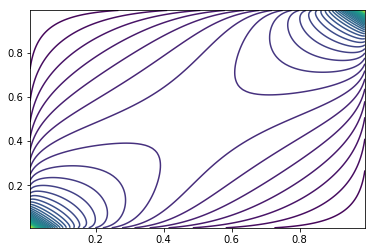

In [70]:
plt.contour(UU1, UU2, ZZ, 80)

Still having trouble seeing how to make that work.

I think we need to use a metropolis algorithm or similar. I.e. sample and reject.

### Metropolis Implementation

We need a Gaussian Normal sampler.

In [71]:
from numpy.random import randn

In [72]:
randn(2)

array([ 1.67280889, -0.35874461])

In [199]:
f = lambda x1, x2: np.exp(-x1**2 - x2**2 - 1.25*x1*x2)

In [200]:
C = scipy.integrate.dblquad(f, -20, 20, lambda x2: -20, lambda x2: 20)[0]
C

4.02445945301314

In [201]:
f = lambda x1, x2: np.exp(-x1**2 - x2**2 - 1.25*x1*x2)/C

In [202]:
delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
xx1, xx2 = np.meshgrid(x1, x2)
n1, n2 = xx1.shape

ZZ = []
for k1 in range(n1):
    temp = []
    for k2 in range(n2):
        temp += [ f(xx1[k1, k2], xx2[k1,k2])]
    ZZ += [temp]

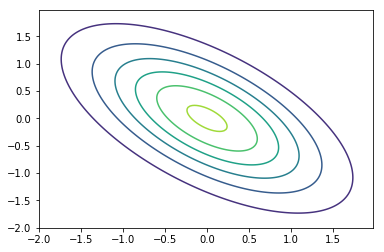

In [203]:
plt.contour(xx1, xx2, ZZ)

In [204]:
g = lambda x, y: 1/(2*np.pi) * np.exp( -1/2*(x[0] - y[0])**2 - 1/2*(x[1] - y[1])**2 )
g((1, 0.5), (0, 0))

0.0851895021952265

In [213]:
sample = [ randn(2) ]
for k in range(100000):
    
    # Choose a proposed new value that is from a Gaussian Normal of mean at the previous accepted sample 
    # and with variances 1 and covariances 0.
    xstar = randn(2) + sample[-1] 
    
    # This will be 1 for us when using the normal distribution as it is symmetric in x and y
    adjust = g(sample[-1], xstar)/g(xstar, sample[-1])
    
    alpha = adjust * f(xstar[0], xstar[1])/f(sample[-1][0], sample[-1][1])
    alpha = np.min( [1, alpha] )
    
    if rand() < alpha:
        sample += [xstar]  

In [214]:
len(sample)

44096

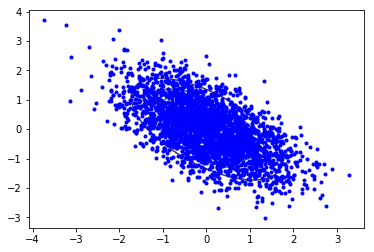

In [216]:
plt.contour(xx1, xx2, ZZ)

# We do two things to adjust the results. We burn the first samples and we only take every 5th one to break down 
# some of the correlations inherent in the markov process.
xx = [sample[5*k][0] for k in range(6000, len(sample)//5)]
yy = [sample[5*k][1] for k in range(6000, len(sample)//5)]
plt.plot(xx, yy, 'b.')

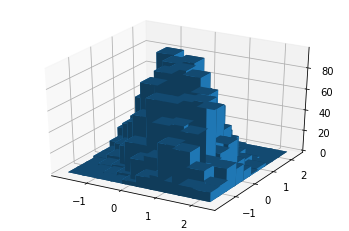

In [208]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(xx, yy, bins=10, range=[[-2, 2], [-2, 2]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

In [209]:
import seaborn as sns

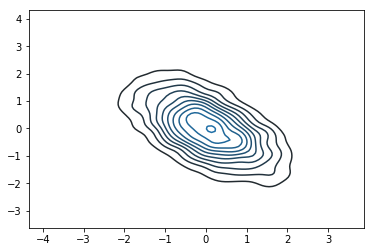

In [217]:
sns.kdeplot(xx, yy)

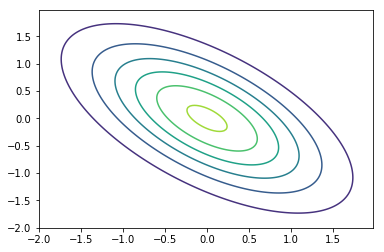

In [218]:
plt.contour(xx1, xx2, ZZ)

Struggles with a distribution that has multiple peaks.

# Try it with a stranger distribution

In [229]:
def f(x1, x2):
    
    if x1 > 0 and x2>0:
        return np.exp(-x1 - x2)/(x1+x2+1)
    else:
        return 0

In [230]:
C = scipy.integrate.dblquad(f, -20, 40, lambda x2: -20, lambda x2: 40)[0]
C

0.4036526295420189

In [231]:
def f(x1, x2):
    
    if x1 > 0 and x2>0:
        return np.exp(-x1 - x2)/(x1+x2+1)/C
    else:
        return 0

In [241]:
delta = 0.025
x1 = np.arange(-1, 4.0, delta)
x2 = np.arange(-1, 4.0, delta)
xx1, xx2 = np.meshgrid(x1, x2)
n1, n2 = xx1.shape

ZZ = []
for k1 in range(n1):
    temp = []
    for k2 in range(n2):
        temp += [ f(xx1[k1, k2], xx2[k1,k2])]
    ZZ += [temp]

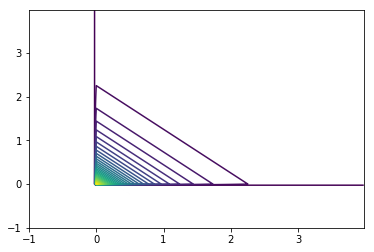

In [242]:
plt.contour(xx1, xx2, ZZ, 40)

In [236]:
g = lambda x, y: 1/(2*np.pi) * np.exp( -1/2*(x[0] - y[0])**2 - 1/2*(x[1] - y[1])**2 )


In [237]:
sample = [ (2, 2)]
for k in range(100000):
    
    # Choose a proposed new value that is from a Gaussian Normal of mean at the previous accepted sample 
    # and with variances 1 and covariances 0.
    xstar = randn(2) + sample[-1] 
    
    # This will be 1 for us when using the normal distribution as it is symmetric in x and y
    adjust = g(sample[-1], xstar)/g(xstar, sample[-1])
    
    alpha = adjust * f(xstar[0], xstar[1])/f(sample[-1][0], sample[-1][1])
    alpha = np.min( [1, alpha] )
    
    if rand() < alpha:
        sample += [xstar] 

In [238]:
len(sample)

23750

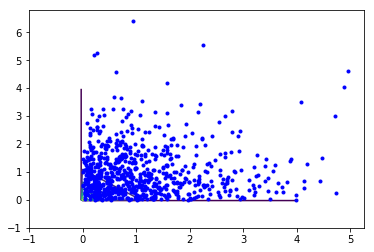

In [246]:
plt.contour(xx1, xx2, ZZ)

xx = [sample[5*k][0] for k in range(4000, len(sample)//5)]
yy = [sample[5*k][1] for k in range(4000, len(sample)//5)]
plt.plot(xx, yy, 'b.')

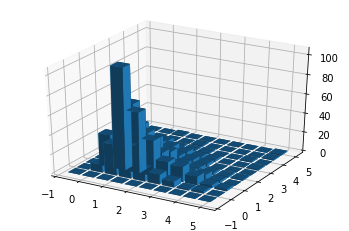

In [249]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(xx, yy, bins=10, range=[[-1, 5], [-1, 5]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

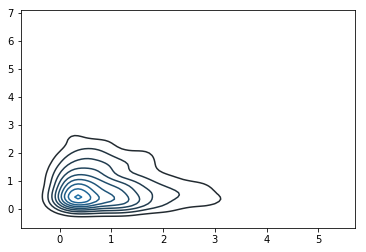

In [247]:
sns.kdeplot(xx, yy)